In [89]:
import pandas as pd
df = pd.read_csv("headphones_Price_Bangladesh.csv")
df
df.head()


,Title,Company_Name,Type,Colour,orginal_price,dicounted_price,Discount,Rating,Location
0,JBL TUNE 110 In-Ear Earphone,JBL,In-Ear,White,1050.0,899,-14%,-186.0,Bangladesh
1,QKZ CK1 HD HiFi Earphone High Sensitivity fone...,QKZ,Earphone,Red,600.0,332,-45%,-256.0,Free Shipping
2,KZ HD9 Earphones HiFi Sport Earbuds Copper Ear...,KZ,Wireless,Black,900.0,265,-71%,-424.0,Free Shipping
3,Lenovo HE05 Bluetooth Wireless Headphones,Lenovo,In-Ear,baby pink,1300.0,510,-61%,-2487.0,Free Shipping
4,Orignal Creative High Bass Audio Earphone with...,Orignal,Earphoone,Active black,299.0,135,-55%,-144.0,Bangladesh


In [90]:

# Calculate the price difference
df['price_diff'] = df['orginal_price'] - df['dicounted_price']

# Summary statistics
print(df.describe())

       orginal_price  dicounted_price       Rating   price_diff
count    2774.000000      3080.000000  1032.000000  2774.000000
mean      931.974766       580.897403   -19.698643   375.008291
std      1225.520753       819.004391    92.679287   558.741954
min        60.000000        35.000000 -2487.000000     1.000000
25%       300.000000       164.750000   -10.000000   110.000000
50%       550.000000       320.000000    -3.000000   220.000000
75%      1000.000000       699.000000    -1.000000   440.000000
max     18999.000000     11779.000000    -1.000000  9341.000000


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

  discount_bin  avg_rating  count
0        0-20%  -19.897959    285
1       20-40%  -15.545788    917
2       40-60%  -17.187817   1137
3       60-80%  -37.424419    429
4      80-100%   -2.000000      6


/var/folders/_z/6b364qnd6c7d5d8pwvmxh5w80000gn/T/ipykernel_4620/2178366870.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = df.groupby('discount_bin').agg(
/var/folders/_z/6b364qnd6c7d5d8pwvmxh5w80000gn/T/ipykernel_4620/2178366870.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_analysis, x='discount_bin', y='avg_rating', palette='viridis')


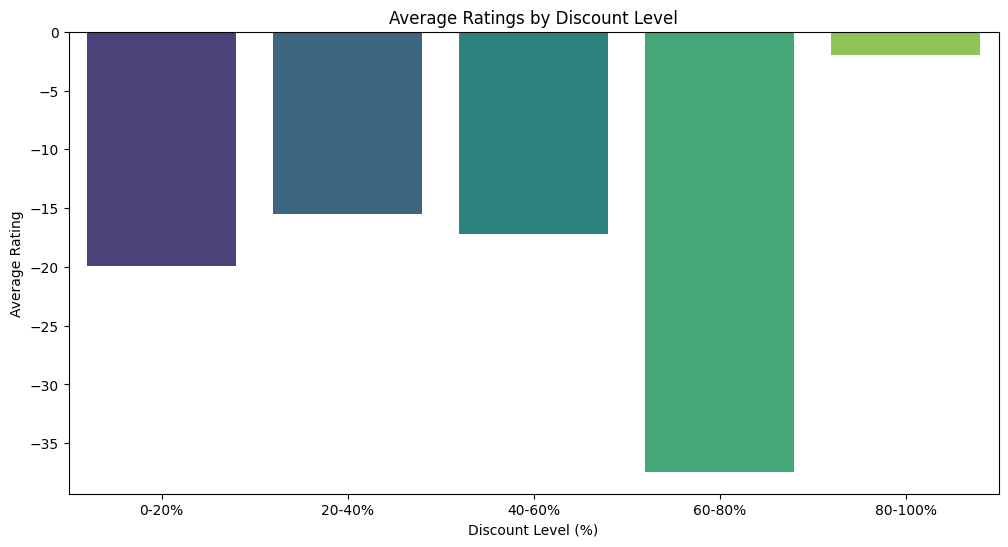

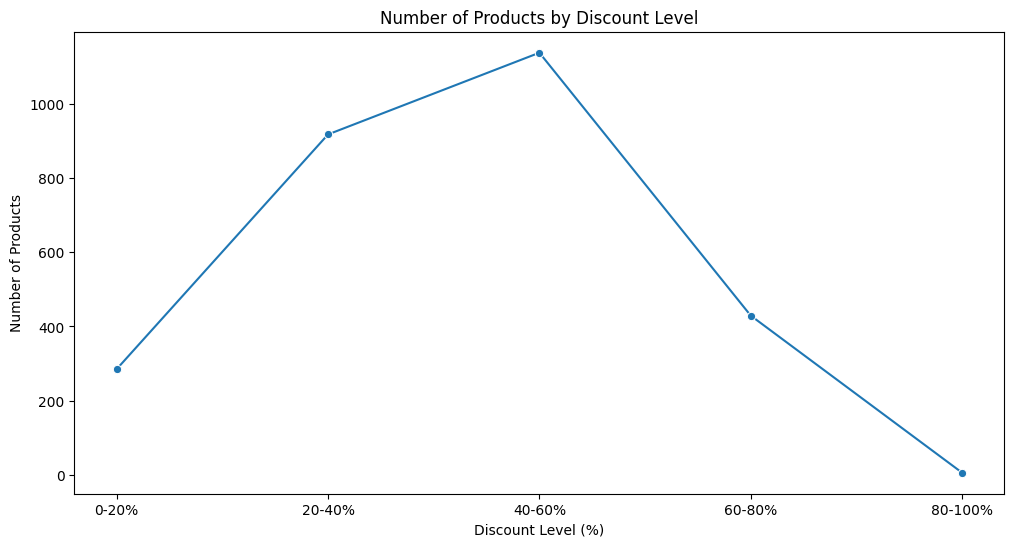

In [39]:
# Calculate discount percentage
df['cal_discount'] = ((df['orginal_price'] - df['dicounted_price']) / df['orginal_price']) * 100

# Categorize discounts into bins (e.g., 0-20%, 20-40%, etc.)
discount_bins = [0, 20, 40, 60, 80, 100]
df['discount_bin'] = pd.cut(df['cal_discount'], bins=discount_bins, labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

# Aggregate data to find average rating and sales metrics within each discount bin
discount_analysis = df.groupby('discount_bin').agg(
    avg_rating=('Rating', 'mean'),
    count=('Rating', 'size')
).reset_index()

# Display the aggregated data
print(discount_analysis)

# Visualization: Plot average rating vs. discount bins
plt.figure(figsize=(12, 6))
sns.barplot(data=discount_analysis, x='discount_bin', y='avg_rating', palette='viridis')
plt.title('Average Ratings by Discount Level')
plt.xlabel('Discount Level (%)')
plt.ylabel('Average Rating')
plt.show()

# Optional: Sales Performance Analysis (if sales data is available)
# Here, sales can be proxied using count or other available metrics
plt.figure(figsize=(12, 6))
sns.lineplot(data=discount_analysis, x='discount_bin', y='count', marker='o')
plt.title('Number of Products by Discount Level')
plt.xlabel('Discount Level (%)')
plt.ylabel('Number of Products')
plt.show()

## Discount Analysis

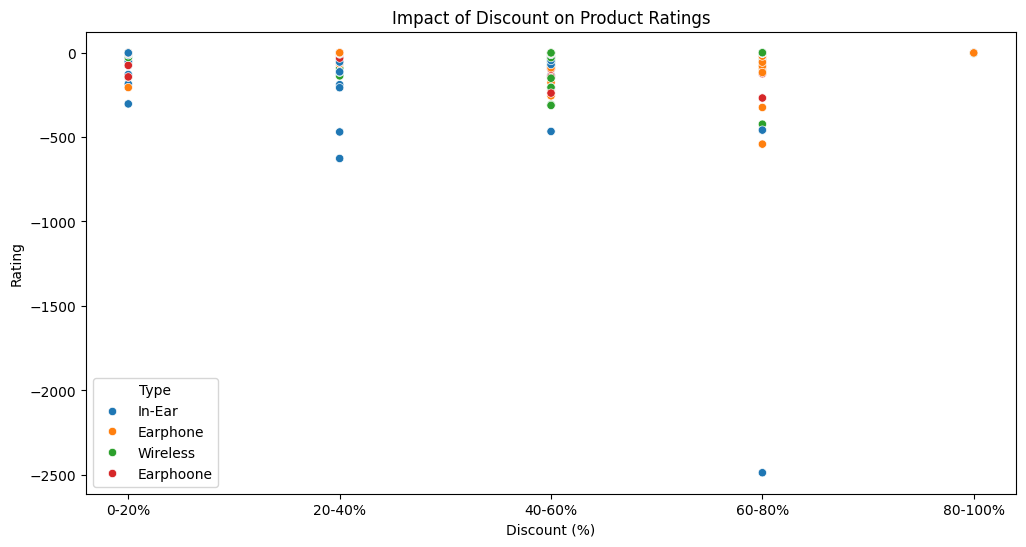

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting discount impact on ratings
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='discount_bin', y='Rating', hue='Type')
plt.title('Impact of Discount on Product Ratings')
plt.xlabel('Discount (%)')
plt.ylabel('Rating')
plt.show()

## Sales Performance by Type and Brand

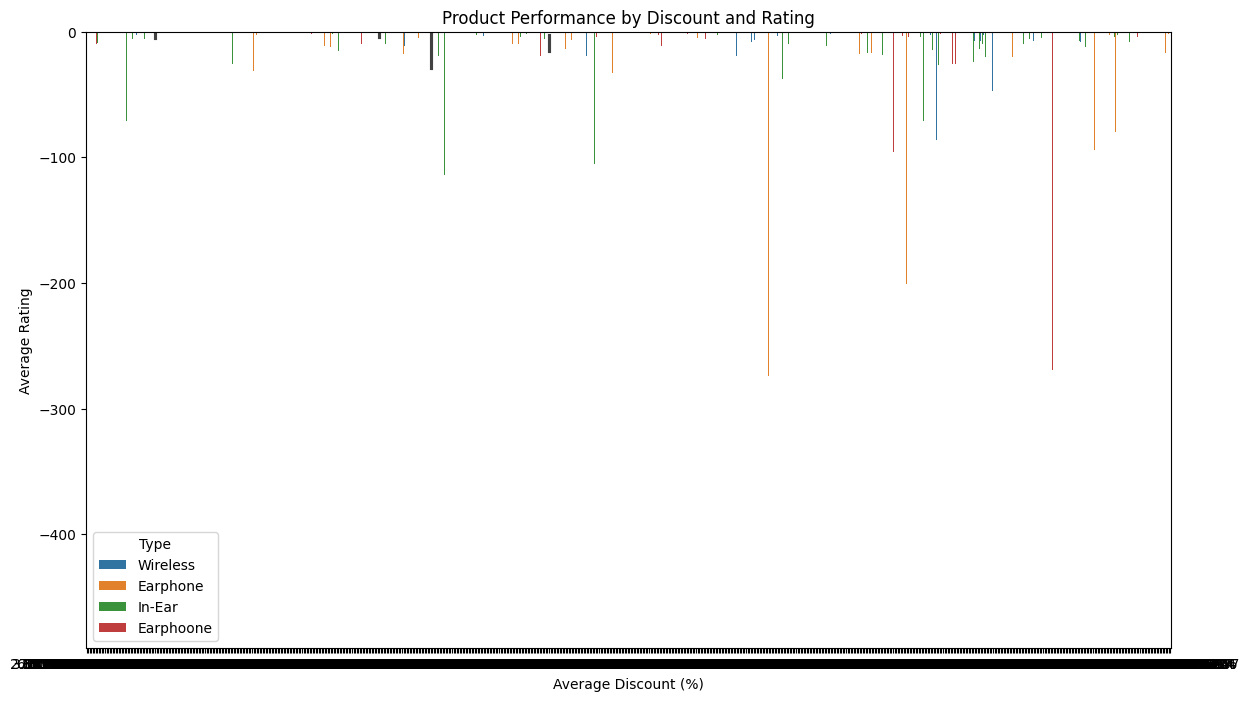

In [47]:
# Group by type and calculate average discount and rating
grouped = df.groupby(['Type', 'Company_Name']).agg(
    avg_discount=('cal_discount', 'mean'),
    avg_rating=('Rating', 'mean')
).reset_index()

# Visualize product performance
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped, x='avg_discount', y='avg_rating', hue='Type')
plt.title('Product Performance by Discount and Rating')
plt.xlabel('Average Discount (%)')
plt.ylabel('Average Rating')
plt.show()

## Customer Sentiment Analysis

In [48]:
pip install pandas nltk seaborn matplotlib

19559.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 869.6 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.9/278.9 kB 5.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 4.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [91]:
df['Rating'] = abs(df['Rating'])
df.head()

,Title,Company_Name,Type,Colour,orginal_price,dicounted_price,Discount,Rating,Location,price_diff
0,JBL TUNE 110 In-Ear Earphone,JBL,In-Ear,White,1050.0,899,-14%,186.0,Bangladesh,151.0
1,QKZ CK1 HD HiFi Earphone High Sensitivity fone...,QKZ,Earphone,Red,600.0,332,-45%,256.0,Free Shipping,268.0
2,KZ HD9 Earphones HiFi Sport Earbuds Copper Ear...,KZ,Wireless,Black,900.0,265,-71%,424.0,Free Shipping,635.0
3,Lenovo HE05 Bluetooth Wireless Headphones,Lenovo,In-Ear,baby pink,1300.0,510,-61%,2487.0,Free Shipping,790.0
4,Orignal Creative High Bass Audio Earphone with...,Orignal,Earphoone,Active black,299.0,135,-55%,144.0,Bangladesh,164.0


In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [93]:
import nltk

# Manually set up SSL context to bypass verification issues
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Download the VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tariqul/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Customer Sentiment

In [94]:
def SentimentAnalysis(rate):
    if rate < 20:
        return 'Terrible experience, the product broke on the first day!'
    elif 20 <= rate < 30:
        return 'Not satisfied with the performance.'
    elif 20 <= rate < 40:
        return 'The earphones stopped working after a week, very disappointed.'
    elif 20 <= rate < 50:
        return 'Excellent sound but not very durable.'
    elif 20 <= rate < 60:
        return 'Loved the design and comfort, would buy again.'
    elif 20 <= rate < 70:
        return 'Decent product, worth the money.'
    elif 20 <= rate < 80:
        return 'Great sound quality and amazing bass!'
    elif 20 <= rate < 90:
        return 'Decent product, worth the money.'
    elif 20 <= rate < 100:
        return 'Amazing product with high-quality sound and build.'
    else:
        return 'Highly recommended for gamers, great audio.'

df['Review'] = df['Rating'].apply(SentimentAnalysis)
df.head()

,Title,Company_Name,Type,Colour,orginal_price,dicounted_price,Discount,Rating,Location,price_diff,Review
0,JBL TUNE 110 In-Ear Earphone,JBL,In-Ear,White,1050.0,899,-14%,186.0,Bangladesh,151.0,"Highly recommended for gamers, great audio."
1,QKZ CK1 HD HiFi Earphone High Sensitivity fone...,QKZ,Earphone,Red,600.0,332,-45%,256.0,Free Shipping,268.0,"Highly recommended for gamers, great audio."
2,KZ HD9 Earphones HiFi Sport Earbuds Copper Ear...,KZ,Wireless,Black,900.0,265,-71%,424.0,Free Shipping,635.0,"Highly recommended for gamers, great audio."
3,Lenovo HE05 Bluetooth Wireless Headphones,Lenovo,In-Ear,baby pink,1300.0,510,-61%,2487.0,Free Shipping,790.0,"Highly recommended for gamers, great audio."
4,Orignal Creative High Bass Audio Earphone with...,Orignal,Earphoone,Active black,299.0,135,-55%,144.0,Bangladesh,164.0,"Highly recommended for gamers, great audio."


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tariqul/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                  Title Company_Name  \
0                          JBL TUNE 110 In-Ear Earphone          JBL   
1     QKZ CK1 HD HiFi Earphone High Sensitivity fone...          QKZ   
2     KZ HD9 Earphones HiFi Sport Earbuds Copper Ear...           KZ   
3             Lenovo HE05 Bluetooth Wireless Headphones       Lenovo   
4     Orignal Creative High Bass Audio Earphone with...      Orignal   
...                                                 ...          ...   
3075  Mi In Ear Earphone Best Bass Sound Quality For...           Mi   
3076  HOCO M68 Super Bass Wired Headphones 3.5mm In ...         HOCO   
3077  Remax RM 711 Earphone Wired Headset Noise Canc...        Remax   
3078              Samsung IG935 in ear headphones-Black      Samsung   
3079                     Remax RM-512 In-ear Headphones        Remax   

           Type       Colour   orginal_price  dicounted_price Discount  \
0        In-Ear         White         1050.0              899

/var/folders/_z/6b364qnd6c7d5d8pwvmxh5w80000gn/T/ipykernel_4620/2579906874.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


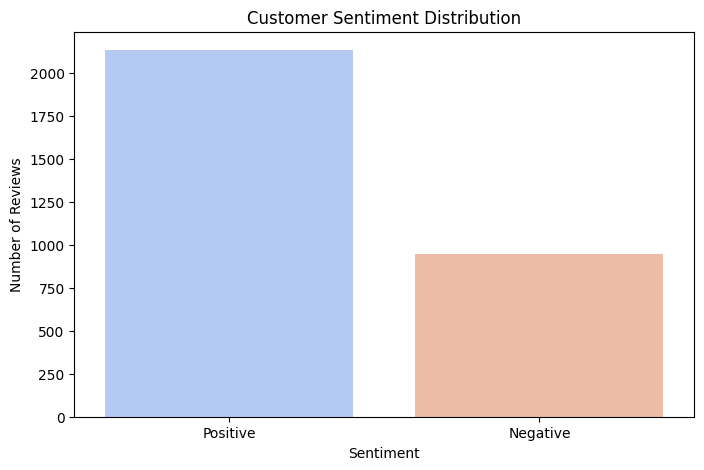

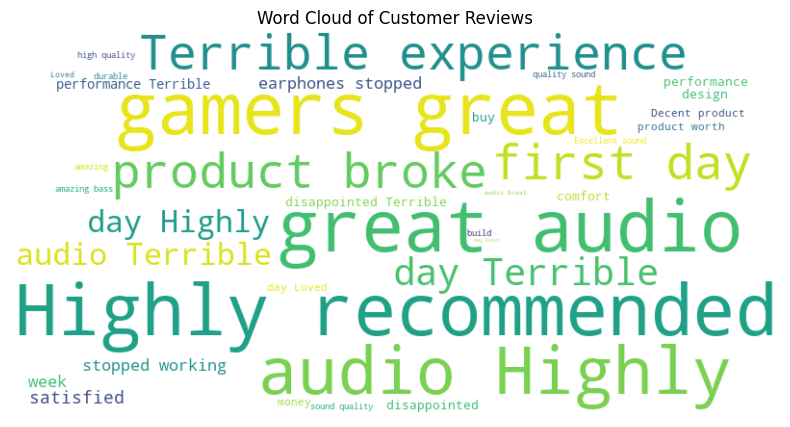

In [97]:

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each review
df['sentiment_score'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Define sentiment based on score
df['sentiment'] = df['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

# Display the sentiment analysis results
print(df)

# Count the number of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Visualization: Sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Customer Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Optional: Word cloud visualization (install wordcloud if needed)
from wordcloud import WordCloud

# Combine all reviews into one text
all_reviews = ' '.join(df['Review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Reviews')
plt.show()


In [99]:
df['dicounted_price'].dtype

dtype('int64')

In [101]:
price = df['dicounted_price']
df['Price_Category'] = np.where(price<= 500, 'low', 
                                  np.where(price >= 1500, 'high', 'medium'))


Text(0.5, 1.0, 'Different price range segments for headphones in Bangladesh')

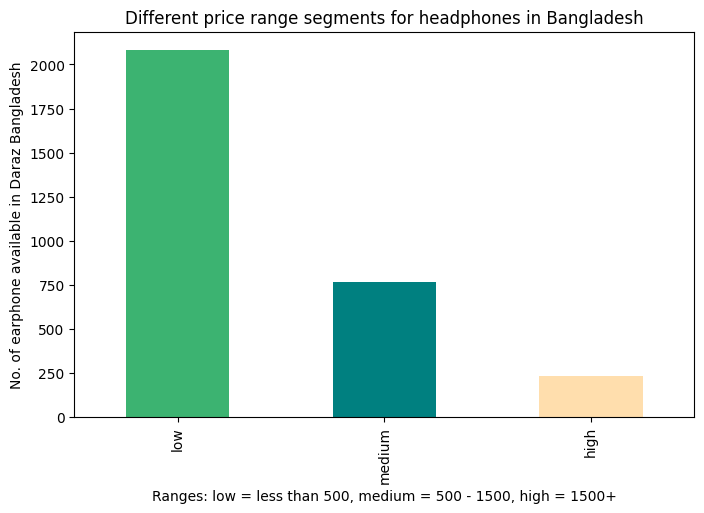

In [105]:
import matplotlib.pyplot as plt
colors_list=['mediumseagreen','teal','navajowhite']
df['Price_Category'].value_counts().plot(kind='bar',figsize=(8,5),color = colors_list)
plt.xlabel("Ranges: low = less than 500, medium = 500 - 1500, high = 1500+")
plt.ylabel("No. of earphone available in Daraz Bangladesh")
plt.title("Different price range segments for headphones in Bangladesh")

In [106]:
price_cat = df['Price_Category']
price_cat.value_counts()

Price_Category
low       2082
medium     765
high       233
Name: count, dtype: int64

In [108]:
product_offered_by_company = df["Company_Name"].value_counts().head(15)
product_offered_by_company.shape

(15,)

Text(0.5, 1.0, 'Top 15 Brand with most earphone/headphone offerings in Daraz BD')

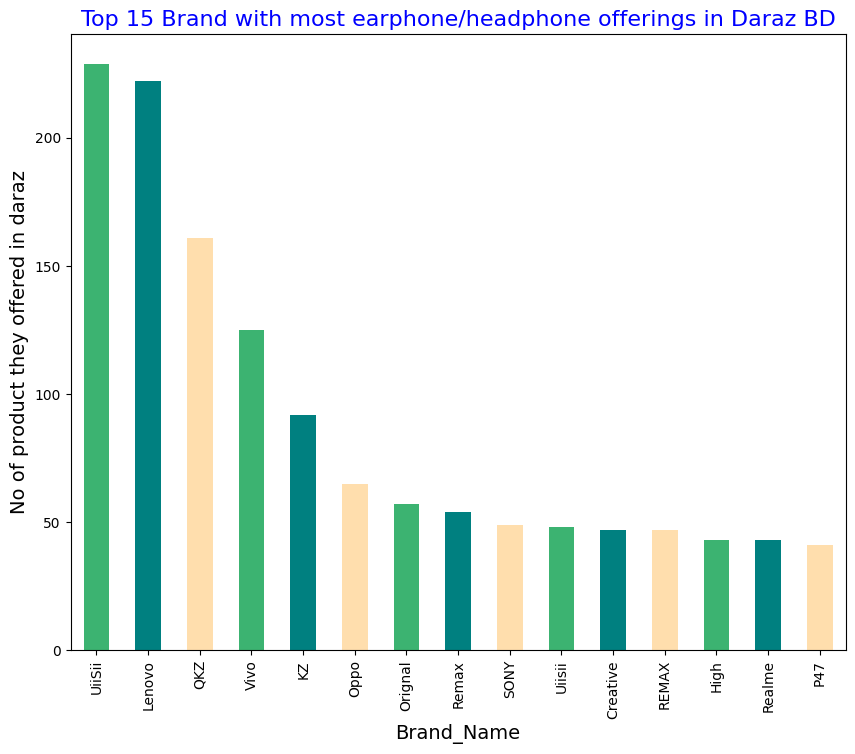

In [109]:
product_offered_by_company.plot(kind='bar',figsize=(10,8),color = colors_list)
plt.xlabel("Brand_Name",fontsize = 14)
plt.ylabel("No of product they offered in daraz", fontsize = 14)
plt.title("Top 15 Brand with most earphone/headphone offerings in Daraz BD",fontsize=16,color="blue")

In [114]:
df.columns

Index(['Title', 'Company_Name', 'Type', 'Colour ', 'orginal_price',
       'dicounted_price', 'Discount', 'Rating', 'Location', 'price_diff',
       'Review', 'sentiment_score', 'sentiment', 'Price_Category'],
      dtype='object')

In [122]:
colour  = df.groupby("Company_Name")['Colour '].max().head(10)

In [123]:
colour

Company_Name
"Baseus               White
(BSHOP                White
(Buy              baby pink
(Gaming               White
(gift)JFKDX    Active black
1                 baby pink
100               baby pink
100h           Active black
13.00 STN               Red
1MORE             baby pink
Name: Colour , dtype: object

Text(0.5, 1.0, 'Most common color and type (on the ear/in the ear etc) offered by various brands')

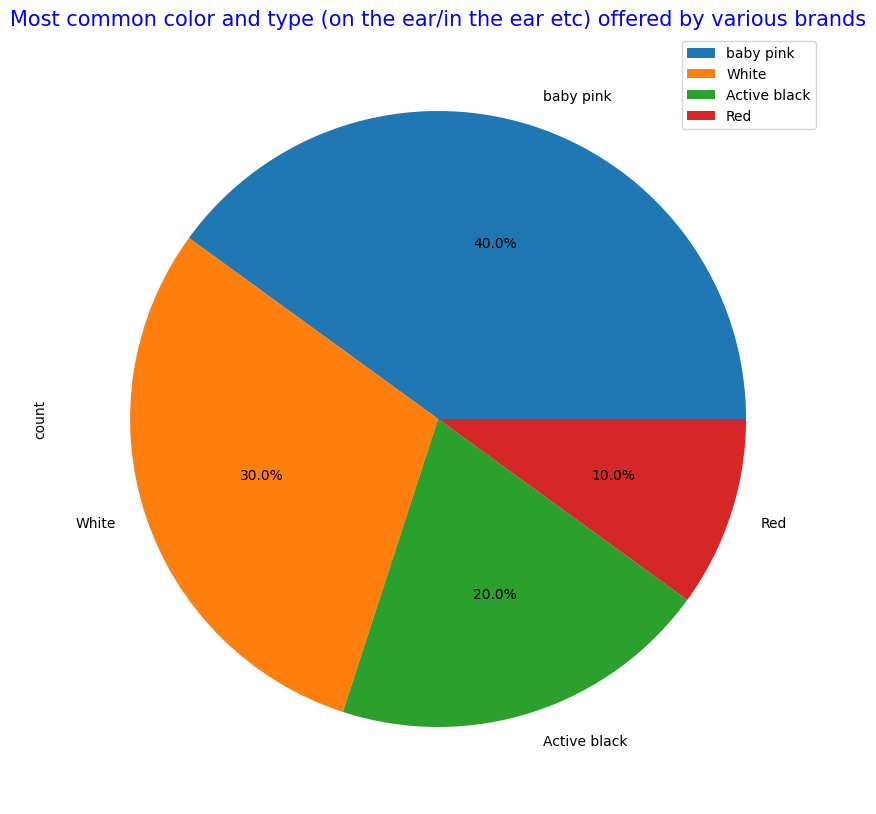

In [124]:
colour.value_counts().plot(kind = "pie",autopct='%1.1f%%',figsize=(10,10))
plt.legend()
plt.title("Most common color and type (on the ear/in the ear etc) offered by various brands",fontsize=15,color="blue")

In [125]:
df.head()

,Title,Company_Name,Type,Colour,orginal_price,dicounted_price,Discount,Rating,Location,price_diff,Review,sentiment_score,sentiment,Price_Category
0,JBL TUNE 110 In-Ear Earphone,JBL,In-Ear,White,1050.0,899,-14%,186.0,Bangladesh,151.0,"Highly recommended for gamers, great audio.",0.7346,Positive,medium
1,QKZ CK1 HD HiFi Earphone High Sensitivity fone...,QKZ,Earphone,Red,600.0,332,-45%,256.0,Free Shipping,268.0,"Highly recommended for gamers, great audio.",0.7346,Positive,low
2,KZ HD9 Earphones HiFi Sport Earbuds Copper Ear...,KZ,Wireless,Black,900.0,265,-71%,424.0,Free Shipping,635.0,"Highly recommended for gamers, great audio.",0.7346,Positive,low
3,Lenovo HE05 Bluetooth Wireless Headphones,Lenovo,In-Ear,baby pink,1300.0,510,-61%,2487.0,Free Shipping,790.0,"Highly recommended for gamers, great audio.",0.7346,Positive,medium
4,Orignal Creative High Bass Audio Earphone with...,Orignal,Earphoone,Active black,299.0,135,-55%,144.0,Bangladesh,164.0,"Highly recommended for gamers, great audio.",0.7346,Positive,low
